### Importing essential libraries

In [6]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [7]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [14]:
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

### Loading the data

In [8]:
df = pd.read_csv("walmart_data.csv")

### Data exploration

In [9]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

In [10]:
df.shape

(550068, 10)

In [11]:
df["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [12]:
df.groupby('Gender')['User_ID'].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

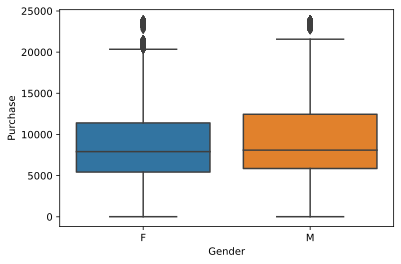

In [15]:
sns.boxplot(x = 'Gender', y = 'Purchase', data = df)

In [16]:
df.groupby('Gender')['Purchase'].describe()

count         mean          std   min     25%     50%      75%  \
Gender                                                                      
F       135809.0  8734.565765  4767.233289  12.0  5433.0  7914.0  11400.0   
M       414259.0  9437.526040  5092.186210  12.0  5863.0  8098.0  12454.0   

            max  
Gender           
F       23959.0  
M       23961.0

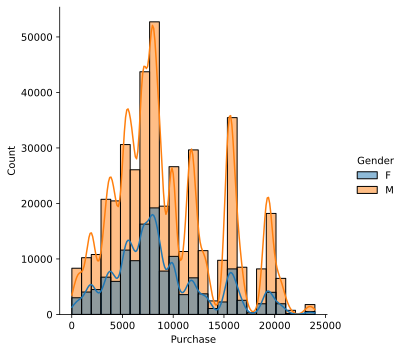

In [17]:
sns.displot(x = 'Purchase', 
            hue = 'Gender', 
            data = df, 
            bins = 25, 
            kde = True)

## CLT

In [19]:
s = 300 # sample size 
iterations = 1000 # total no. of samples

In [20]:
df.groupby('Gender')['Purchase'].describe()

count         mean          std   min     25%     50%      75%  \
Gender                                                                      
F       135809.0  8734.565765  4767.233289  12.0  5433.0  7914.0  11400.0   
M       414259.0  9437.526040  5092.186210  12.0  5863.0  8098.0  12454.0   

            max  
Gender           
F       23959.0  
M       23961.0

In [21]:
df.sample(300).groupby('Gender')['Purchase'].describe()

count         mean          std    min     25%     50%      75%  \
Gender                                                                    
F        85.0  8239.329412  4071.721753  473.0  5466.0  7887.0   9929.0   
M       215.0  9255.344186  4976.111238   12.0  5676.0  8033.0  12389.0   

            max  
Gender           
F       19496.0  
M       23652.0

In [22]:
df.sample(300).groupby('Gender')['Purchase'].describe()

count         mean          std    min     25%     50%      75%  \
Gender                                                                    
F        71.0  7748.394366  4500.849658  474.0  4451.5  7079.0   8840.5   
M       229.0  9379.554585  4907.334330  487.0  5928.0  8118.0  12430.0   

            max  
Gender           
F       20541.0  
M       23234.0

In [23]:
df.sample(300).groupby('Gender')['Purchase'].describe()

count         mean          std    min     25%     50%      75%  \
Gender                                                                    
F        81.0  8914.740741  4402.856899   14.0  5444.0  8719.0  11843.0   
M       219.0  9624.027397  5043.266738  748.0  6005.5  8251.0  12094.0   

            max  
Gender           
F       20184.0  
M       23188.0

In [27]:
# df[df["Gender"]=="F"]

## Males

In [ ]:
df[df["Gender"]=="M"]

In [29]:
s = 300 # sample size 
iterations = 1000 # total no. of samples

In [30]:
male_sample_mean = [df[df["Gender"]=="M"].sample(s)["Purchase"].mean() for i in range(iterations)]

In [31]:
male_sample_mean[:5]

[9608.093333333334,
 9264.206666666667,
 8924.28,
 9395.263333333334,
 9314.713333333333]

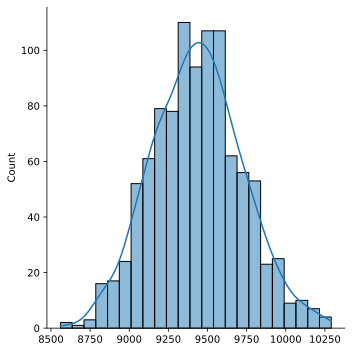

In [32]:
sns.displot(male_sample_mean, kde = True)

In [33]:
np.mean(male_sample_mean) # M

9435.227246666665

In [34]:
female_sample_mean = [df[df["Gender"]=="F"].sample(s)["Purchase"].mean() for i in range(iterations)]

In [35]:
female_sample_mean[:5]

[8817.573333333334,
 8762.69,
 8072.293333333333,
 9105.366666666667,
 8195.493333333334]

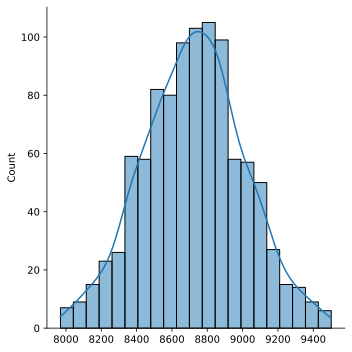

In [37]:
sns.displot(female_sample_mean, kde = True)

In [39]:
np.mean(male_sample_mean)

9435.227246666665

In [38]:
np.mean(female_sample_mean) # M

8724.301373333334

## COnfidence Intervals

In [41]:
males_lower_limit = np.mean(male_sample_mean) - 1.96 * np.std(male_sample_mean)
males_lower_limit

8869.890618226736

In [42]:
males_upper_limit = np.mean(male_sample_mean) + 1.96 * np.std(male_sample_mean)
males_upper_limit

10000.563875106594

In [43]:
## 95% CI for males purchase amount
(males_lower_limit, males_upper_limit)

(8869.890618226736, 10000.563875106594)

In [44]:
females_lower_limit = np.mean(female_sample_mean) - 1.96 * np.std(female_sample_mean)
females_lower_limit

8169.757225068376

In [45]:
females_upper_limit = np.mean(female_sample_mean) + 1.96 * np.std(female_sample_mean)
females_upper_limit

9278.84552159829

In [46]:
## 95% CI for females purchase amount
(females_lower_limit, females_upper_limit)

(8169.757225068376, 9278.84552159829)

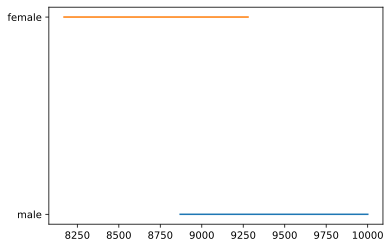

In [47]:
plt.plot((males_lower_limit, males_upper_limit), [0, 0])

plt.plot((females_lower_limit, females_upper_limit), [1, 1])

plt.yticks(range(2), ["male", "female"])

plt.show()

## Percentile method

In [49]:
male_sample_mean[:5]

[9608.093333333334,
 9264.206666666667,
 8924.28,
 9395.263333333334,
 9314.713333333333]

In [52]:
male_confidence_interval = np.percentile(male_sample_mean, [2.5,97.5])
male_confidence_interval

array([ 8867.98825   , 10022.71583333])

In [53]:
female_confidence_interval = np.percentile(female_sample_mean, [2.5,97.5])
female_confidence_interval

array([8152.82916667, 9295.85058333])

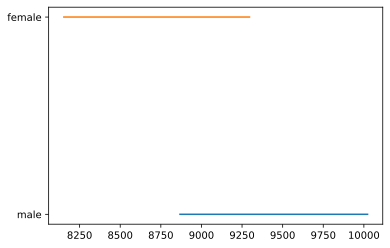

In [54]:
plt.plot((male_confidence_interval[0], male_confidence_interval[1]), [0, 0])

plt.plot((female_confidence_interval[0], female_confidence_interval[1]), [1, 1])

plt.yticks(range(2), ["male", "female"])

plt.show()

In [ ]:
## 90% CI
## marital status
## age bins

## YULU INTRODUCTION

In [56]:
yulu = pd.read_csv("bike_sharing.csv")

In [57]:
yulu.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1